# English Premier League sports-betting model

## Overview

## Business Problem
- Bettors are looking for a model that can be used to place their bets on Premier League matches. This model will be used in replacement of their own intuition/biases.
- General sports bettors who gamble as a hobby
- FanDuel, DraftKings, --> provide insight on which teams are most likely to win and price competitions
- model deployment

## Data Preprocessing and Cleaning

In [80]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# reading in the data
df = pd.read_excel('/Users/schoollaptop/Documents/FLATIRON2021/CAPSTONE/results.xlsm')
df.head()

,Season,DateTime,HomeTeam,AwayTeam,HomeML,DrawML,AwayML,ML_Favorite,Home_Favorite?,FTHG,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2003-04,2004-02-11T00:00:00Z,Birmingham,Everton,-105.0,215.0,229.0,Birmingham,1.0,3,...,11,3,8,11,10,14,1,0,0,0
1,2003-04,2004-02-11T00:00:00Z,Blackburn,Newcastle,150.0,210.0,138.0,Newcastle,0.0,1,...,7,7,8,6,12,10,0,0,0,0
2,2003-04,2004-02-11T00:00:00Z,Charlton,Tottenham,110.0,215.0,195.0,Charlton,1.0,2,...,14,10,10,4,13,14,3,0,0,0
3,2003-04,2004-02-11T00:00:00Z,Fulham,Aston Villa,102.0,215.0,210.0,Fulham,1.0,1,...,6,3,6,5,16,17,2,1,1,0
4,2003-04,2004-02-11T00:00:00Z,Liverpool,Man City,-172.0,240.0,383.0,Liverpool,1.0,2,...,7,3,6,3,7,8,0,0,0,0


In [82]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          6657 non-null   object 
 1   DateTime        6657 non-null   object 
 2   HomeTeam        6657 non-null   object 
 3   AwayTeam        6657 non-null   object 
 4   HomeML          397 non-null    float64
 5   DrawML          397 non-null    float64
 6   AwayML          397 non-null    float64
 7   ML_Favorite     6654 non-null   object 
 8   Home_Favorite?  12 non-null     float64
 9   FTHG            6657 non-null   int64  
 10  FTAG            6657 non-null   int64  
 11  FTR             6657 non-null   object 
 12  HTHG            6657 non-null   int64  
 13  HTAG            6657 non-null   int64  
 14  HTR             6657 non-null   object 
 15  Referee         6657 non-null   object 
 16  HS              6657 non-null   int64  
 17  AS              6657 non-null   i

In [83]:
df.describe()

,HomeML,DrawML,AwayML,Home_Favorite?,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,397.000000,397.000000,397.000000,12.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000
mean,22.947103,241.443325,264.916877,0.833333,1.525913,1.152772,0.683191,0.504431,13.673426,10.847980,6.112814,4.795403,6.041160,4.790446,11.127385,11.588403,1.424666,1.741175,0.060087,0.087877
std,233.480851,49.595892,255.740884,0.389249,1.305026,1.142862,0.834831,0.719963,5.363752,4.672221,3.391968,2.849578,3.110078,2.746684,3.650893,3.818804,1.186770,1.271276,0.248180,0.295090
min,-667.000000,200.000000,-286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-139.000000,216.000000,156.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,110.000000,222.000000,208.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,11.000000,1.000000,2.000000,0.000000,0.000000
75%,147.000000,240.000000,345.000000,1.000000,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,13.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,715.000000,517.000000,899.000000,1.000000,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,28.000000,7.000000,9.000000,3.000000,2.000000


It looks like the Home Moneyline (HomeML), Draw Moneyline (DrawML), and Away Moneyline (AwayML) odds are only provided for about 400 games. It is probably safe to get rid of these columns altogether because the dataset provides the straight up favorite already in the column, 'ML_Favorite'.

In [84]:
df = df.drop(['HomeML','DrawML','AwayML','Home_Favorite?'], axis=1)
df.head()

,Season,DateTime,HomeTeam,AwayTeam,ML_Favorite,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2003-04,2004-02-11T00:00:00Z,Birmingham,Everton,Birmingham,3,0,H,2,0,...,11,3,8,11,10,14,1,0,0,0
1,2003-04,2004-02-11T00:00:00Z,Blackburn,Newcastle,Newcastle,1,1,D,0,0,...,7,7,8,6,12,10,0,0,0,0
2,2003-04,2004-02-11T00:00:00Z,Charlton,Tottenham,Charlton,2,4,A,0,2,...,14,10,10,4,13,14,3,0,0,0
3,2003-04,2004-02-11T00:00:00Z,Fulham,Aston Villa,Fulham,1,2,A,1,2,...,6,3,6,5,16,17,2,1,1,0
4,2003-04,2004-02-11T00:00:00Z,Liverpool,Man City,Liverpool,2,1,H,1,0,...,7,3,6,3,7,8,0,0,0,0


Now I will rename some of the columns to make them easier to understand

In [85]:
df.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'ML_Favorite', 'FTHG',
       'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST',
       'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [86]:
df.rename(columns={'FTHG':'FullTime_HomeGoals',
                   'FTAG':'FullTime_AwayGoals',
                   'FTR':'FullTime_Result',
                   'HTHG':'HalfTime_HomeGoals',
                   'HTAG':'HalfTime_AwayGoals',
                   'HTR':'HalfTime_Result',
                   'HS':'Home_Shots',
                   'AS':'Away_Shots',
                   'HST':'Home_ShotsOnTarget',
                   'AST':'Away_ShotsOnTarget',
                   'HC':'Home_Corners',
                   'AC':'Away_Corners',
                   'HF':'Home_Fouls',
                   'AF':'Away_Fouls',
                   'HY':'Home_YellowCs',
                   'AY':'Away_YellowCs',
                   'HR':'Home_RedCs',
                   'AR':'Away_RedCs'}, inplace=True)

In [87]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,ML_Favorite,FullTime_HomeGoals,FullTime_AwayGoals,FullTime_Result,HalfTime_HomeGoals,HalfTime_AwayGoals,...,Home_ShotsOnTarget,Away_ShotsOnTarget,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_YellowCs,Away_YellowCs,Home_RedCs,Away_RedCs
0,2003-04,2004-02-11T00:00:00Z,Birmingham,Everton,Birmingham,3,0,H,2,0,...,11,3,8,11,10,14,1,0,0,0
1,2003-04,2004-02-11T00:00:00Z,Blackburn,Newcastle,Newcastle,1,1,D,0,0,...,7,7,8,6,12,10,0,0,0,0
2,2003-04,2004-02-11T00:00:00Z,Charlton,Tottenham,Charlton,2,4,A,0,2,...,14,10,10,4,13,14,3,0,0,0
3,2003-04,2004-02-11T00:00:00Z,Fulham,Aston Villa,Fulham,1,2,A,1,2,...,6,3,6,5,16,17,2,1,1,0
4,2003-04,2004-02-11T00:00:00Z,Liverpool,Man City,Liverpool,2,1,H,1,0,...,7,3,6,3,7,8,0,0,0,0


And finally, I will change the 'FullTime_Result' and 'HalfTime_Result' columns so that instead of strings of 'H', 'D', and 'A', they will be 2, 1, and 0 respectively.

Full Time Result explained:
- 2 = Home win
- 1 = Draw
- 0 = Away win

Half Time Result explained:
- 2 = Home team winning at halftime
- 1 = Draw/tie at halftime
- 0 = Away team winning at halftime

In [88]:
# map a dictionary to convert strings to integers
# Full Time Result
df['FullTime_Result'] = df['FullTime_Result'].map({'H': 2,
                                                   'D': 1,
                                                   'A': 0})

# map a dictionary to convert strings to integers
df['HalfTime_Result'] = df['HalfTime_Result'].map({'H': 2,
                                                   'D': 1,
                                                   'A': 0})

In [89]:
df[['FullTime_Result', 'HalfTime_Result']]

,FullTime_Result,HalfTime_Result
0,2,2
1,1,1
2,0,0
3,0,0
4,2,2
...,...,...
6652,1,1
6653,1,0
6654,2,2
6655,0,0


## Feature Engineering

Some matches did not provide whether or not the home team was the favorite to win the game. It would be interesting to have this data for all of the matches so we will create a new column of the same name but have it be filled with booleans (True/False) and later replace them with 1s and 0s respectively

In [90]:
df['HomeTeam_Favorite'] = (df['HomeTeam'] == df['ML_Favorite'])

In [91]:
df['HomeTeam_Favorite'][20]

True

In [92]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,ML_Favorite,FullTime_HomeGoals,FullTime_AwayGoals,FullTime_Result,HalfTime_HomeGoals,HalfTime_AwayGoals,...,Away_ShotsOnTarget,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_YellowCs,Away_YellowCs,Home_RedCs,Away_RedCs,HomeTeam_Favorite
0,2003-04,2004-02-11T00:00:00Z,Birmingham,Everton,Birmingham,3,0,2,2,0,...,3,8,11,10,14,1,0,0,0,True
1,2003-04,2004-02-11T00:00:00Z,Blackburn,Newcastle,Newcastle,1,1,1,0,0,...,7,8,6,12,10,0,0,0,0,False
2,2003-04,2004-02-11T00:00:00Z,Charlton,Tottenham,Charlton,2,4,0,0,2,...,10,10,4,13,14,3,0,0,0,True
3,2003-04,2004-02-11T00:00:00Z,Fulham,Aston Villa,Fulham,1,2,0,1,2,...,3,6,5,16,17,2,1,1,0,True
4,2003-04,2004-02-11T00:00:00Z,Liverpool,Man City,Liverpool,2,1,2,1,0,...,3,6,3,7,8,0,0,0,0,True


In [93]:
# map a dictionary to replace True and False with 1 and 0, respectively
df['HomeTeam_Favorite'] = df['HomeTeam_Favorite'].map({True: 1,
                                                 False: 0})

In [94]:
df['HomeTeam_Favorite']

0       1
1       0
2       1
3       1
4       1
       ..
6652    0
6653    0
6654    1
6655    1
6656    0
Name: HomeTeam_Favorite, Length: 6657, dtype: int64

HomeTeam_Favorite explained:
- 1: Home team was the betting favorite to win the game
- 0: Away team was the betting favorite to win the game

Conversion Rate is calculated as the number of goals divided by the total number of shots. We will create a column for both the Home and Away team.

In [95]:
# Home Conversion Rate
df['Home_ConversionRate'] = df['FullTime_HomeGoals'] / df['Home_Shots']

# Away Conversion Rate
df['Away_ConversionRate'] = df['FullTime_AwayGoals'] / df['Away_Shots']

In [96]:
df[['Home_ConversionRate','Away_ConversionRate']]

,Home_ConversionRate,Away_ConversionRate
0,0.200000,0.000000
1,0.058824,0.071429
2,0.111111,0.333333
3,0.076923,0.200000
4,0.166667,0.166667
...,...,...
6652,0.000000,0.000000
6653,0.111111,0.222222
6654,0.117647,0.071429
6655,0.055556,0.153846


New column for each time based on what percentage of their total shots were shots on target

In [97]:
# Home Shots on Target (SoT percentage)
df['Home_SoT%'] = df['Home_ShotsOnTarget'] / df['Home_Shots']

# Away Shots on Target (SoT percentage)
df['Away_SoT%'] = df['Away_ShotsOnTarget'] / df['Away_Shots']

In [98]:
df[['Home_SoT%','Away_SoT%']]

,Home_SoT%,Away_SoT%
0,0.733333,0.600000
1,0.411765,0.500000
2,0.777778,0.833333
3,0.461538,0.300000
4,0.583333,0.500000
...,...,...
6652,0.095238,0.250000
6653,0.222222,0.555556
6654,0.470588,0.214286
6655,0.277778,0.461538


Did the team that was favored to win actually end up winning?

In [99]:
# creating a Pandas series by using a for loop that determines whether the home team or the away team was the
# betting favorite in the match. I decided to use integers because strings are more difficult to work with.
# I am appending the integer 2 because that is what is used to identify the home team in 'FullTime_Result'
# After creating this 'favorites' column, I will identify whether or not the favored team actually won

favorites = []

for match in range(0,6657):
    # if the home team is favored, append a 2
    if df['HomeTeam'][match] == df['ML_Favorite'][match]:
        favorites.append(2)
    # if the away team is favored, append a 0
    else:
        favorites.append(0)

In [100]:
favorites = pd.Series(favorites)

In [101]:
df['Favorites'] = favorites

'Favorites' column explained:
- 2 = Home Team favored to win the match
- 0 = Away Team favored to win the match

In [102]:
df[['FullTime_Result','Favorites']]

,FullTime_Result,Favorites
0,2,2
1,1,0
2,0,2
3,0,2
4,2,2
...,...,...
6652,1,0
6653,1,0
6654,2,2
6655,0,2


In [103]:
# using np.where to fill in 1 for when a favored team wins and 0 for when a favored team loses OR draws
df['Favorite_Winner'] = np.where((df['FullTime_Result'] == df['Favorites']), 1, 0)

In [104]:
df[['FullTime_Result','Favorites','Favorite_Winner']]

,FullTime_Result,Favorites,Favorite_Winner
0,2,2,1
1,1,0,0
2,0,2,0
3,0,2,0
4,2,2,1
...,...,...,...
6652,1,0,0
6653,1,0,0
6654,2,2,1
6655,0,2,0


Favorite Winner explained:
- 1 = the favored team ended up winning the game
- 0 = the favored team ended up losing OR drawing the game

In [105]:
# now what columns do we have?
df.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'ML_Favorite',
       'FullTime_HomeGoals', 'FullTime_AwayGoals', 'FullTime_Result',
       'HalfTime_HomeGoals', 'HalfTime_AwayGoals', 'HalfTime_Result',
       'Referee', 'Home_Shots', 'Away_Shots', 'Home_ShotsOnTarget',
       'Away_ShotsOnTarget', 'Home_Corners', 'Away_Corners', 'Home_Fouls',
       'Away_Fouls', 'Home_YellowCs', 'Away_YellowCs', 'Home_RedCs',
       'Away_RedCs', 'HomeTeam_Favorite', 'Home_ConversionRate',
       'Away_ConversionRate', 'Home_SoT%', 'Away_SoT%', 'Favorites',
       'Favorite_Winner'],
      dtype='object')

We MIGHT no longer need the 'ML_Favorite' column but will keep for now. We will also not need the DateTime or Referee column because they are irrelevant for this analysis

In [106]:
df.drop(['DateTime','Referee'], axis=1, inplace=True)

In [107]:
df.head()

,Season,HomeTeam,AwayTeam,ML_Favorite,FullTime_HomeGoals,FullTime_AwayGoals,FullTime_Result,HalfTime_HomeGoals,HalfTime_AwayGoals,HalfTime_Result,...,Away_YellowCs,Home_RedCs,Away_RedCs,HomeTeam_Favorite,Home_ConversionRate,Away_ConversionRate,Home_SoT%,Away_SoT%,Favorites,Favorite_Winner
0,2003-04,Birmingham,Everton,Birmingham,3,0,2,2,0,2,...,0,0,0,1,0.200000,0.000000,0.733333,0.600000,2,1
1,2003-04,Blackburn,Newcastle,Newcastle,1,1,1,0,0,1,...,0,0,0,0,0.058824,0.071429,0.411765,0.500000,0,0
2,2003-04,Charlton,Tottenham,Charlton,2,4,0,0,2,0,...,0,0,0,1,0.111111,0.333333,0.777778,0.833333,2,0
3,2003-04,Fulham,Aston Villa,Fulham,1,2,0,1,2,0,...,1,1,0,1,0.076923,0.200000,0.461538,0.300000,2,0
4,2003-04,Liverpool,Man City,Liverpool,2,1,2,1,0,2,...,0,0,0,1,0.166667,0.166667,0.583333,0.500000,2,1


## EDA

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomeTeam_Favorite', ylabel='count'>

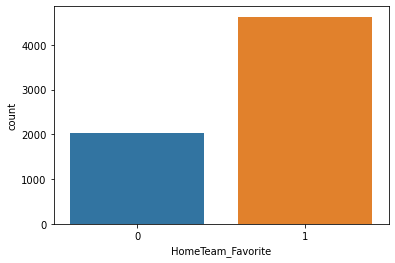

In [108]:
# count of home teams that were favored to win
sns.countplot(df['HomeTeam_Favorite'])

In [109]:
# percentage of games where the home team was the favorite
home_favorite_percentage = len(df[df['HomeTeam_Favorite'] == 1]) / len(df['HomeTeam_Favorite'])

print('Home Teams were favored in ' + str(round(home_favorite_percentage, ndigits=4)) + 
      '% of all matches in the dataset.')

Home Teams were favored in 0.6948% of all matches in the dataset.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomeTeam_Favorite', ylabel='count'>

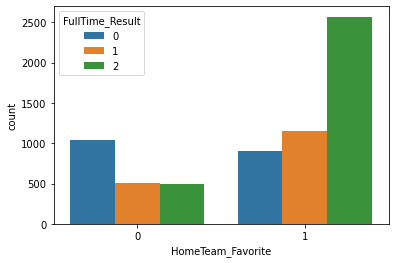

In [110]:
# count of home favorites that actually won
sns.countplot(df['HomeTeam_Favorite'], hue=df['FullTime_Result'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Favorite_Winner', ylabel='count'>

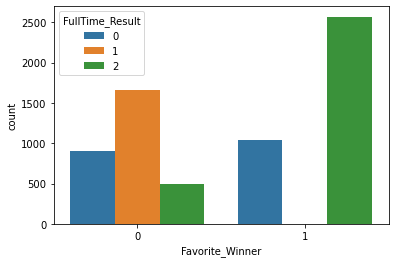

In [111]:
sns.countplot(df['Favorite_Winner'], hue=df['FullTime_Result'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FullTime_Result', ylabel='count'>

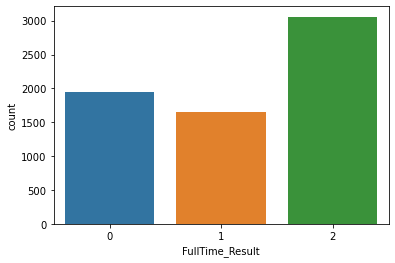

In [112]:
# Distribution of results
sns.countplot(df['FullTime_Result'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HalfTime_Result', ylabel='count'>

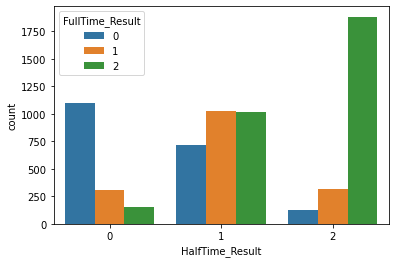

In [113]:
# how many teams leading at half time went on to win the game?
sns.countplot(df['HalfTime_Result'], hue=df['FullTime_Result'])

In [114]:
# percentage of games where home team winning at half time AND ends up 
# winning at full time
len(df[(df['HalfTime_Result'] == 2) & (df['FullTime_Result'] == 2)]) / len(df)

0.28270992939762657

In [115]:
# percentage of games where away team winning at half time AND ends up 
# winning at full time
len(df[(df['HalfTime_Result'] == 0) & (df['FullTime_Result'] == 0)]) / len(df)

0.16554003304791948

In [116]:
# percentage of games where home team winning at half time AND ends up 
# losing/drawing at full time
len(df[(df['HalfTime_Result'] == 2) & (df['FullTime_Result'] != 2)]) / len(df)

0.06624605678233439

In [117]:
# percentage of games where away team winning at half time AND ends up 
# losing/drawing at full time
len(df[(df['HalfTime_Result'] == 0) & (df['FullTime_Result'] != 0)]) / len(df)

0.07045215562565721

In [118]:
# percentage of games where it's a draw at halftime AND ends up 
# as a draw at full time
len(df[(df['HalfTime_Result'] == 1) & (df['FullTime_Result'] == 1)]) / len(df)

0.15382304341294878

### Reducing the amount of dimensions in dataset: get rid of redundant and/or irrelevant features

<AxesSubplot:>

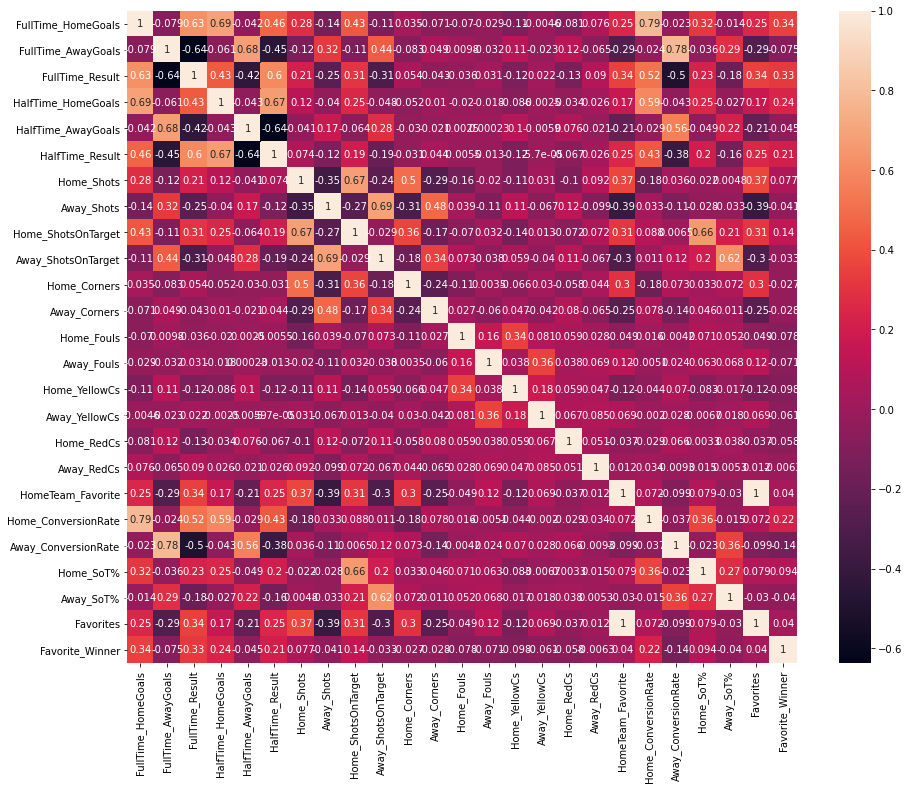

In [119]:
# heatmap correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

Ultimately, we want the model to be able to predict 'FullTime_Result' so let's see which columns are most/least correlated with this target variable

In [120]:
df.corr()['FullTime_Result'].sort_values(ascending=False)

FullTime_Result        1.000000
FullTime_HomeGoals     0.627083
HalfTime_Result        0.602206
Home_ConversionRate    0.516432
HalfTime_HomeGoals     0.434142
Favorites              0.341739
HomeTeam_Favorite      0.341739
Favorite_Winner        0.327223
Home_ShotsOnTarget     0.309438
Home_SoT%              0.232704
Home_Shots             0.214076
Away_RedCs             0.090447
Home_Corners           0.053508
Away_Fouls             0.031430
Away_YellowCs          0.022138
Home_Fouls            -0.035652
Away_Corners          -0.042672
Home_YellowCs         -0.116995
Home_RedCs            -0.131621
Away_SoT%             -0.184058
Away_Shots            -0.252295
Away_ShotsOnTarget    -0.308754
HalfTime_AwayGoals    -0.424904
Away_ConversionRate   -0.497444
FullTime_AwayGoals    -0.635393
Name: FullTime_Result, dtype: float64

It will be better to have a dataset without all of the extra, redundant columns in it. For example, ShotsOnTarget, ShotsOnTarget%, and Shots are all basically saying the same thing. In this case, we will keep ShotsOnTarget because it is slightly higher correlated with Full Time Result

In [121]:
df.columns

Index(['Season', 'HomeTeam', 'AwayTeam', 'ML_Favorite', 'FullTime_HomeGoals',
       'FullTime_AwayGoals', 'FullTime_Result', 'HalfTime_HomeGoals',
       'HalfTime_AwayGoals', 'HalfTime_Result', 'Home_Shots', 'Away_Shots',
       'Home_ShotsOnTarget', 'Away_ShotsOnTarget', 'Home_Corners',
       'Away_Corners', 'Home_Fouls', 'Away_Fouls', 'Home_YellowCs',
       'Away_YellowCs', 'Home_RedCs', 'Away_RedCs', 'HomeTeam_Favorite',
       'Home_ConversionRate', 'Away_ConversionRate', 'Home_SoT%', 'Away_SoT%',
       'Favorites', 'Favorite_Winner'],
      dtype='object')

In [122]:
cleaned_df = df.drop(['Favorites',
                      'Home_SoT%',
                      'Home_Shots',
                      'Away_RedCs',
                      'Home_Corners',
                      'Away_Corners',
                      'Home_YellowCs',
                      'Away_YellowCs',
                      'Away_SoT%',
                      'Away_Shots',
                      'Season',
                      'ML_Favorite'], axis=1)

In [123]:
cleaned_df.head()

,HomeTeam,AwayTeam,FullTime_HomeGoals,FullTime_AwayGoals,FullTime_Result,HalfTime_HomeGoals,HalfTime_AwayGoals,HalfTime_Result,Home_ShotsOnTarget,Away_ShotsOnTarget,Home_Fouls,Away_Fouls,Home_RedCs,HomeTeam_Favorite,Home_ConversionRate,Away_ConversionRate,Favorite_Winner
0,Birmingham,Everton,3,0,2,2,0,2,11,3,10,14,0,1,0.200000,0.000000,1
1,Blackburn,Newcastle,1,1,1,0,0,1,7,7,12,10,0,0,0.058824,0.071429,0
2,Charlton,Tottenham,2,4,0,0,2,0,14,10,13,14,0,1,0.111111,0.333333,0
3,Fulham,Aston Villa,1,2,0,1,2,0,6,3,16,17,1,1,0.076923,0.200000,0
4,Liverpool,Man City,2,1,2,1,0,2,7,3,7,8,0,1,0.166667,0.166667,1


<AxesSubplot:>

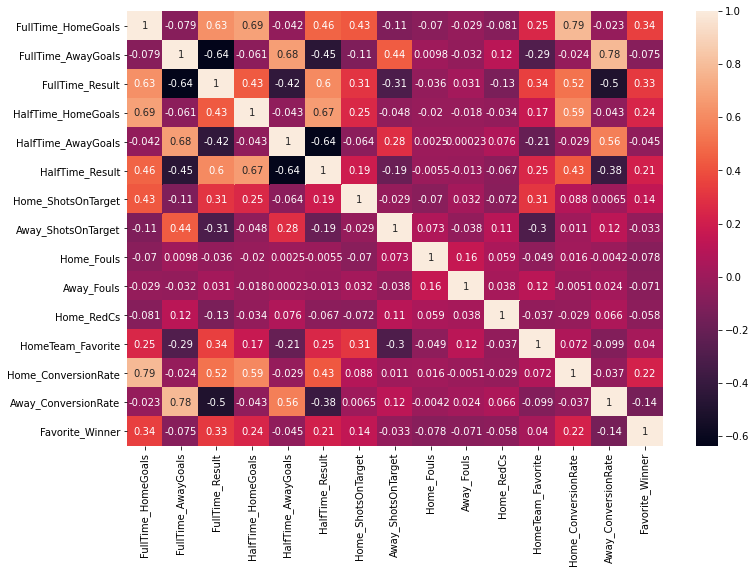

In [124]:
# new heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_df.corr(),annot=True)

In [125]:
# correlation with full time result
cleaned_df.corr()['FullTime_Result'].sort_values(ascending=False)

FullTime_Result        1.000000
FullTime_HomeGoals     0.627083
HalfTime_Result        0.602206
Home_ConversionRate    0.516432
HalfTime_HomeGoals     0.434142
HomeTeam_Favorite      0.341739
Favorite_Winner        0.327223
Home_ShotsOnTarget     0.309438
Away_Fouls             0.031430
Home_Fouls            -0.035652
Home_RedCs            -0.131621
Away_ShotsOnTarget    -0.308754
HalfTime_AwayGoals    -0.424904
Away_ConversionRate   -0.497444
FullTime_AwayGoals    -0.635393
Name: FullTime_Result, dtype: float64

## Modeling Process

In [126]:
cleaned_df = cleaned_df.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 0 to 6656
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomeTeam             6653 non-null   object 
 1   AwayTeam             6653 non-null   object 
 2   FullTime_HomeGoals   6653 non-null   int64  
 3   FullTime_AwayGoals   6653 non-null   int64  
 4   FullTime_Result      6653 non-null   int64  
 5   HalfTime_HomeGoals   6653 non-null   int64  
 6   HalfTime_AwayGoals   6653 non-null   int64  
 7   HalfTime_Result      6653 non-null   int64  
 8   Home_ShotsOnTarget   6653 non-null   int64  
 9   Away_ShotsOnTarget   6653 non-null   int64  
 10  Home_Fouls           6653 non-null   int64  
 11  Away_Fouls           6653 non-null   int64  
 12  Home_RedCs           6653 non-null   int64  
 13  HomeTeam_Favorite    6653 non-null   int64  
 14  Home_ConversionRate  6653 non-null   float64
 15  Away_ConversionRate  6653 non-null   f

In [127]:
# target feature is FullTime_Result
# for baseline model, we will only input the column that identifies betting favorite
X = cleaned_df[['HomeTeam_Favorite']]
y = cleaned_df['FullTime_Result']

In [128]:
X

,HomeTeam_Favorite
0,1
1,0
2,1
3,1
4,1
...,...
6652,0
6653,0
6654,1
6655,1


In [129]:
y

0       2
1       1
2       0
3       0
4       2
       ..
6652    1
6653    1
6654    2
6655    0
6656    1
Name: FullTime_Result, Length: 6653, dtype: int64

### Train | Test split

In [130]:
from sklearn.model_selection import train_test_split

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [131]:
# scaling?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


### Baseline Model - Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

# base model --> default parameters
log_model = LogisticRegression()

# fit training data
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [133]:
log_model.coef_

array([[-0.44470989],
       [ 0.04420094],
       [ 0.40050896]])

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix



In [137]:
y_preds = log_model.predict(scaled_X_test)
accuracy_score(y_test, y_preds)

0.5228365384615384

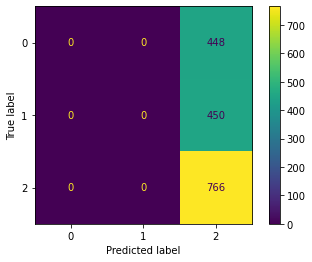

In [138]:
plot_confusion_matrix(log_model, X_test, y_test)

In [139]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       448
           1       0.00      0.00      0.00       450
           2       0.55      0.84      0.67       766

    accuracy                           0.52      1664
   macro avg       0.34      0.45      0.38      1664
weighted avg       0.38      0.52      0.44      1664



/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, not terrible. The baseline model is scoring 52% on overall accuracy which it means it is classifying a little over half of the matches correctly. The baseline model is not able to predict draws/ties because the only data that was fed in was HomeTeam_Favorite. This column only identifies whether or not the Home Team was the betting favorite. Additionally, a draw/tie is never the betting favorite for a Premier League match.

### Model 2 - Logistic Regression with more columns

In [140]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 0 to 6656
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomeTeam             6653 non-null   object 
 1   AwayTeam             6653 non-null   object 
 2   FullTime_HomeGoals   6653 non-null   int64  
 3   FullTime_AwayGoals   6653 non-null   int64  
 4   FullTime_Result      6653 non-null   int64  
 5   HalfTime_HomeGoals   6653 non-null   int64  
 6   HalfTime_AwayGoals   6653 non-null   int64  
 7   HalfTime_Result      6653 non-null   int64  
 8   Home_ShotsOnTarget   6653 non-null   int64  
 9   Away_ShotsOnTarget   6653 non-null   int64  
 10  Home_Fouls           6653 non-null   int64  
 11  Away_Fouls           6653 non-null   int64  
 12  Home_RedCs           6653 non-null   int64  
 13  HomeTeam_Favorite    6653 non-null   int64  
 14  Home_ConversionRate  6653 non-null   float64
 15  Away_ConversionRate  6653 non-null   f

In [141]:
# train_test_split
# NOT including full time home and away goals because that gives away the result but will include half time
# stats for live-betting considerations
X = cleaned_df.drop(['HomeTeam',
                     'AwayTeam',
                     'FullTime_HomeGoals',
                     'FullTime_AwayGoals',
                     'Favorite_Winner',
                     'FullTime_Result'], axis=1)
                    
y = cleaned_df['FullTime_Result']

In [145]:
cleaned_df['Home_ConversionRate'] = cleaned_df['Home_ConversionRate'].round(2)
cleaned_df['Away_ConversionRate'] = cleaned_df['Away_ConversionRate'].round(2)

In [146]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [75]:
X_test.shape

(1664, 11)

In [76]:
y_train.shape

(4989,)

In [77]:
y_test.shape

(1664,)

In [78]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
# predictions
y_preds2 = log_model2.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
accuracy_score(y_test, y_preds2)

## Note for 11/23
- Morning work --> figure out the value error (too large for dtype)
- Possible fix --> convert the column to a percentage by multiplying by 100
- Another solution --> do not include the column in the model